<a href="https://colab.research.google.com/github/michou237/energies-en-France/blob/main/projetSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-7-a408b6530770>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected_hour['Date'] = pd.to_datetime(data_selected_hour['Date'], errors='coerce')


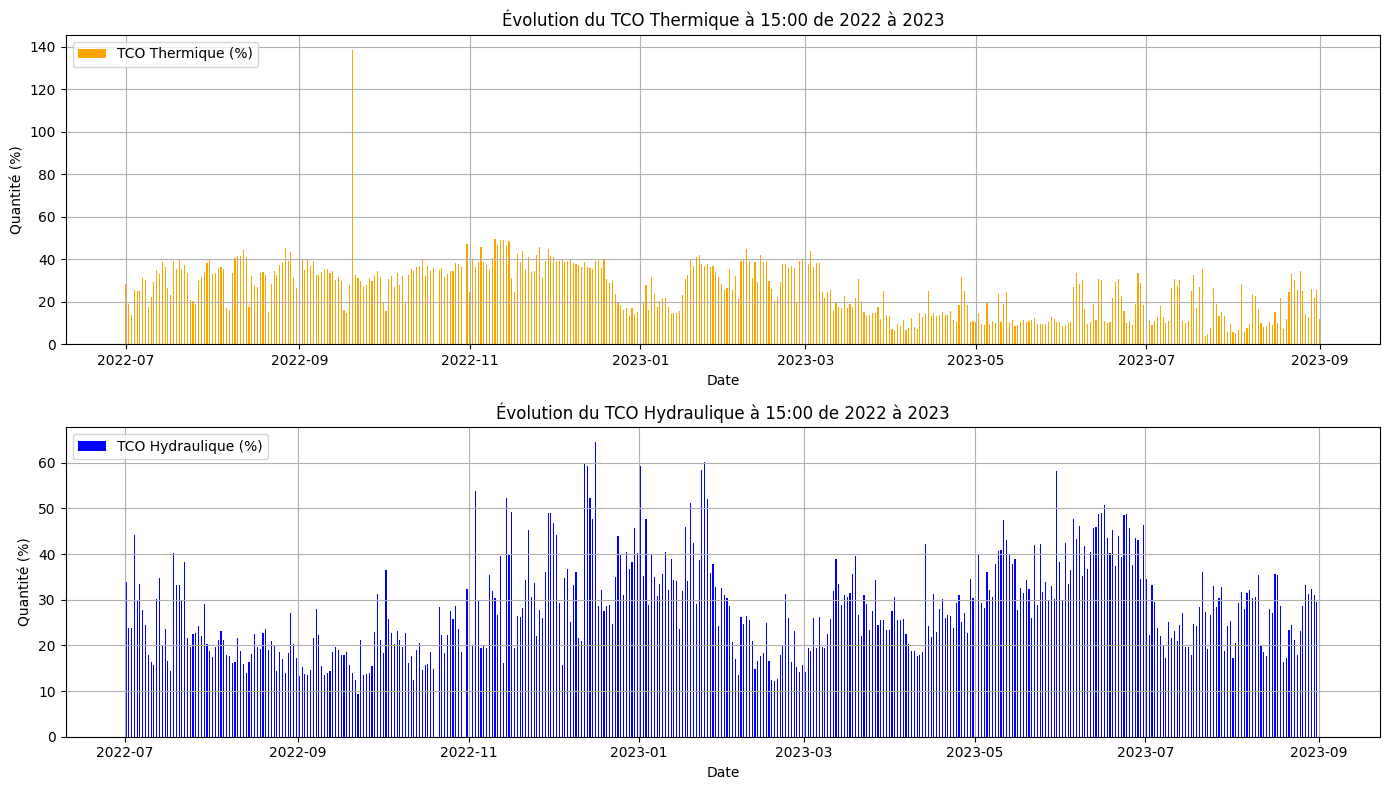

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv("eco2mix-regional-tr.csv", sep=";")

# Filtrer les données pour obtenir des données à une heure précise
heure = '15:00'
#intervalle de temps pour montrer l'évolution
date_debut = '2022-09-01'
date_fin = '2023-09-01'

mask = (data['Heure'] == heure) & (data['Date'] >= date_debut) & (data['Date'] <= date_fin)
data_selected_hour = data[mask]

# s'assurer que la colonne 'Date' est de type datetime
data_selected_hour['Date'] = pd.to_datetime(data_selected_hour['Date'], errors='coerce')

# Tracer les barres
fig, ax = plt.subplots(2, 1, figsize=(14, 8))

# Largeur des barres
bar_width = 0.4

# Premier graphique
ax[0].bar(data_selected_hour['Date'], data_selected_hour["TCO Thermique (%)"], color="orange", width=bar_width, label="TCO Thermique (%)", align='center')
ax[0].set_title(f'Évolution du TCO Thermique à {heure} de 2022 à 2023')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Quantité (%)')
ax[0].legend()
ax[0].grid(True)

# Deuxième graphique
ax[1].bar(data_selected_hour['Date'] + pd.Timedelta(bar_width, unit='d'), data_selected_hour["TCO Hydraulique (%)"], color="blue", width=bar_width, label="TCO Hydraulique (%)", align='center')
ax[1].set_title(f'Évolution du TCO Hydraulique à {heure} de 2022 à 2023')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Quantité (%)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()  # Pour éviter que les graphiques se chevauchent
plt.show()


<ipython-input-23-d7bcd3bde6e4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected_hour['Date'] = pd.to_datetime(data_selected_hour['Date'], errors='coerce')


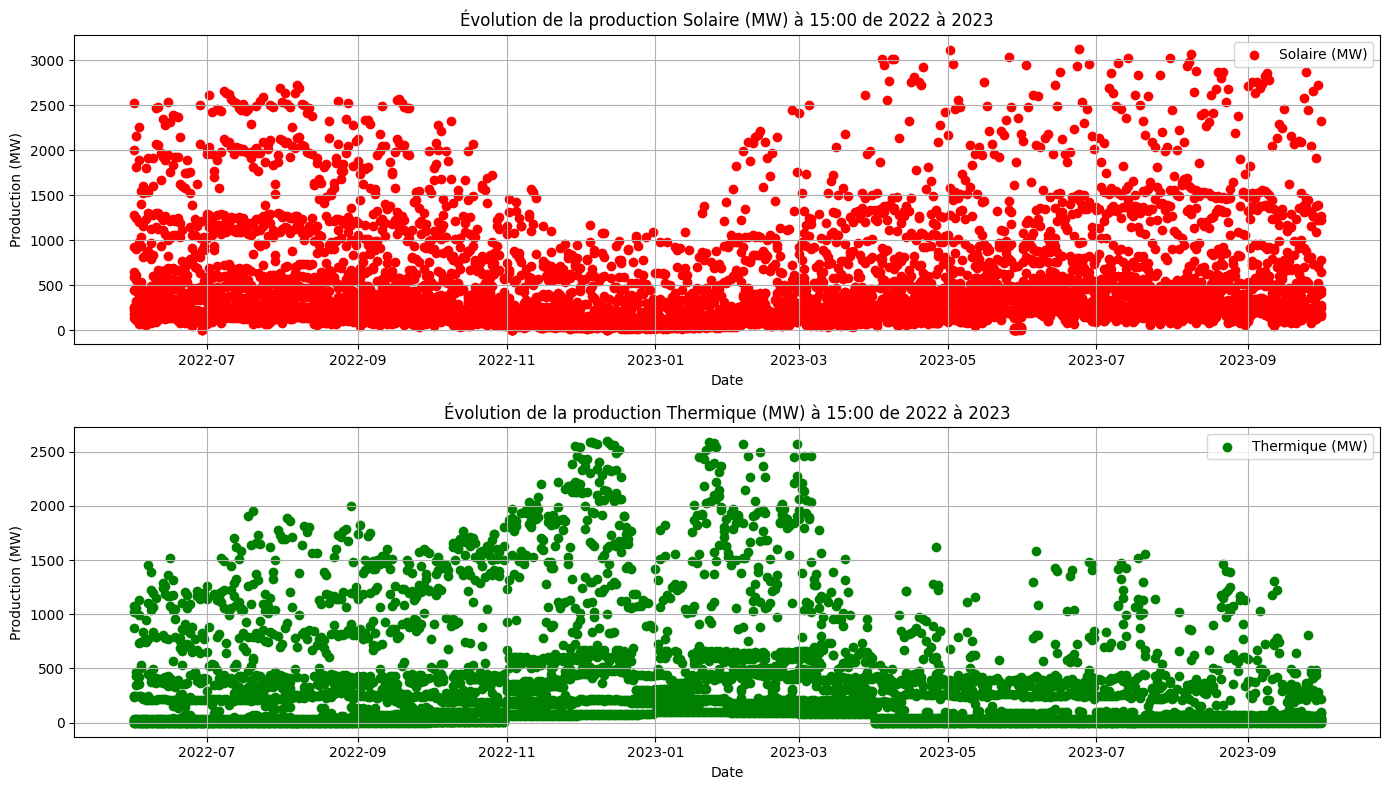

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv("eco2mix-regional-tr.csv", sep=";")

# Filtrer les données pour obtenir des données à une heure précise
heure = '15:00'
date_debut = '2022-04-01'
date_fin = '2023-10-01'

mask = (data['Heure'] == heure) & (data['Date'] >= date_debut) & (data['Date'] <= date_fin)
data_selected_hour = data[mask]

# Assurez-vous que la colonne 'Date' est de type datetime
data_selected_hour['Date'] = pd.to_datetime(data_selected_hour['Date'], errors='coerce')

# Tracer les graphiques en nuages de points empilés
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
# Ajoutez d'autres énergies au besoin
# Assigner une couleur différente à chaque énergie produite
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
colors = { 'Solaire (MW)': 'red', 'Thermique (MW)':'green'}

for i, (energy, color) in enumerate(colors.items()):
    ax[i].scatter(data_selected_hour['Date'], data_selected_hour[energy], label=energy, color=color)
    ax[i].set_title(f'Évolution de la production {energy} à {heure} de 2022 à 2023')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Production (MW)')
    ax[i].legend()
    ax[i].grid(True)

plt.tight_layout()
plt.show()
